#### Evaluation - Comparing Our Models 

The purpose of this notebook is to compare how our models performed across genre and model architecture. This notebook should be run as-is, as it does not have customizable parameters.

In [61]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import syllables
from utils import tokenize
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
# constants - filepaths to txt files with sequences generated by our models 
NGRAM_COUNTRY_SEQS_PATH = "generated_txts/ngram_country.txt"
NGRAM_METAL_SEQS_PATH = "generated_txts/ngram_metal.txt"

LSTM_COUNTRY_SEQS_PATH = ""
LSTM_METAL_SEQS_PATH = ""

GPT2_COUNTRY_SEQS_PATH = "generated_txts/gpt2_country.txt"
GPT2_METAL_SEQS_PATH = "generated_txts/gpt2_metal.txt"

##### Perplexity Across Models and Genres on Test Dataset 

NGRAM\
Mean Test Perplexity for Country Model: 2507.33\
Mean Test Perplexity for Heavy Metal Model: 3818.62


GPT2
Metal: 3446.1595516494554

In [71]:
# created with reference to matplotlib documentation https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
def create_grouped_barchart(country_data: tuple, metal_data: tuple, title: str, ylabel: str):
    """ 
    Creates a grouped bar chart comparing the Ngram, RNN and GPT2 models across the country and heavy metal genres.
    Will create two bargraphs for each type of model: one for country, another for heavy metal
    
    Args:
        country_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the country genre
        metal_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the heavy metal genre
        title (str): title for the barchart
        ylabel (str): y-axis label for the barchart 
    """
    models = ("N-Gram", "RNN with LSTMs", "Fine-tuned GPT-2")
    genres = {
        'Country': country_data,
        'Heavy Metal': metal_data,
    }

    x = np.arange(len(models))  # label locations
    width = 0.25  # the width of the bars
    multiplier = .5

    fig, ax = plt.subplots(layout='constrained')

    for genre, perplexity in genres.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, perplexity, width, label=genre)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncols=3)

    plt.show()

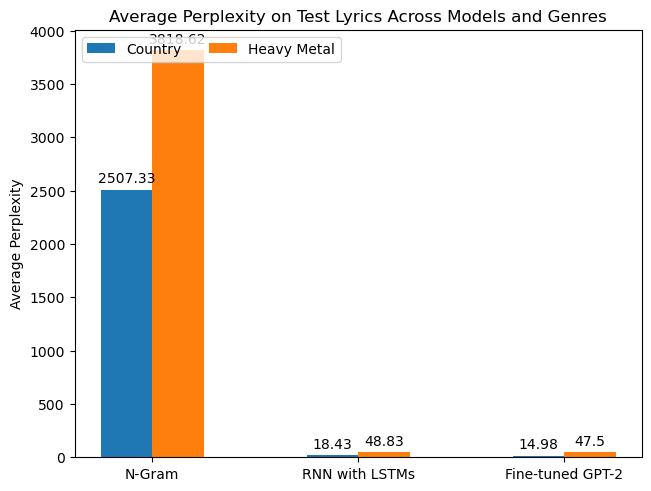

In [96]:
# FAKE NUMBERS -- REPLACE!!! 
country_perplexity = (2507.33, 18.43, 14.98)
metal_perplexity = (3818.62, 48.83, 47.50)
create_grouped_barchart(country_perplexity, metal_perplexity, 'Average Perplexity on Test Lyrics Across Models and Genres', 'Average Perplexity')

#### Assessing the Generated Sequences 

In [98]:
def read_lines(filepath: str) -> list:
    """
    Reads from the provided filepath and produces a list of strings, 
    each element in the list corresponding to a line in the txt file.
    """   
    lines = []

    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Remove trailing newline characters from each line
    lines = [line.strip() for line in lines]

    return lines 

In [106]:
# sequences generated by our models
ngram_country_seqs = read_lines(NGRAM_COUNTRY_SEQS_PATH)
ngram_metal_seqs = read_lines(NGRAM_METAL_SEQS_PATH)

#lstm_country_seqs = read_lines(LSTM_COUNTRY_SEQS_PATH)
#lstm_metal_seqs = read_lines(LSTM_METAL_SEQS_PATH)

gpt2_country_seqs = read_lines(GPT2_COUNTRY_SEQS_PATH)
gpt2_metal_seqs = read_lines(GPT2_METAL_SEQS_PATH)

##### Sample Sequences 

In [78]:
print("N-Gram Model, Country:")
print("\n".join(ngram_country_seqs[:10]))

N-Gram Model, Country:
by the woman he loves
it 's been a great afternoon , yes sir
you do n't take my eyes off you
i 'll love you , leave you , iâ€™ll love you â€˜til then ...
born
raise your lighters in the air
come on baby lets get outta here
walk on walk on little doll
but sometimes an old memory .
the rumors flew but nobody know how much they need you back in memphis , but she  me like the wind


In [79]:
print("N-Gram Model, Heavy Metal:")
print("\n".join(ngram_metal_seqs[:10]))

N-Gram Model, Heavy Metal:
one can not placate
the wake you left is vicious
i cultivate evil that 's surrounding me .
so it shall come to me ...
royalty and  ,  denied the  teat
a passionate hour ` s never crossing our mind
we wo n't be fooled just like a lady she 'll keep you safe
for he passed away
darkness in my soul is taking hold and becoming
and you got me rockin ' and a reelin ' barbara ann


In [ ]:
print("RNN + LSTMs Model, Country:")
print("\n".join(lstm_country_seqs[:15]))

In [ ]:
print("RNN + LSTMs Model, Heavy Metal:")
print("\n".join(lstm_metal_seqs[:15]))

In [107]:
print("GPT2 Model, Country:")
print("\n".join(gpt2_country_seqs[:10]))

GPT2 Model, Country:

you  been  just  a  different

,  the  man  that  i  could  get  back
to  make  it  together ,  take  a  lot  of
us  the  things  that  said ,  we 're  right
:  the  music
just  where  the  way  in  the  day
,  the  love  is  gone
the  angels  can  make  a  big  wind


In [108]:
print("GPT2 Model, Heavy Metal:")
print("\n".join(gpt2_metal_seqs[:10]))

GPT2 Model, Heavy Metal:
to  kill  a  demon from  your  breath,
i  see ,  how  we  all  all

for  an  end
at  you
in  this  town ,  the  moon lit  wall .


to  my  name ,  i  can  feel  the  way
and  the  people  like  the  power


##### Average Line Length

In [81]:
def avg_tokens_per_line(lines: list):
    """ 
    Computes the average number of tokens per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of tokens in the lines 
    """
    num_tokens = [len(nltk.word_tokenize(line)) for line in lines]
    return np.mean(num_tokens)

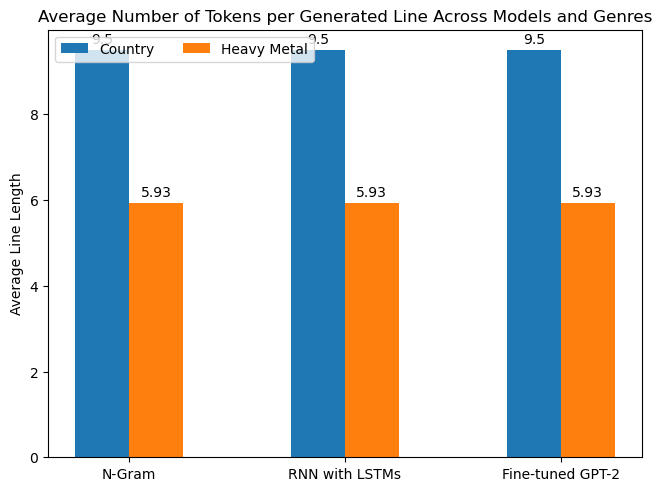

In [82]:
country_line_lengths = (avg_tokens_per_line(ngram_country_seqs))
metal_line_lengths = (avg_tokens_per_line(ngram_metal_seqs))
create_grouped_barchart(country_line_lengths, metal_line_lengths, 'Average Number of Tokens per Generated Line Across Models and Genres', 'Average Line Length')

##### Average Syllables per Line 

In [83]:
def avg_syllables_per_line(lines: list):
    """ 
    Computes the average number of syllables per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of syllables in the lines 
    """
    num_syllables = [syllables.estimate(line) for line in lines]
    return np.mean(num_syllables)

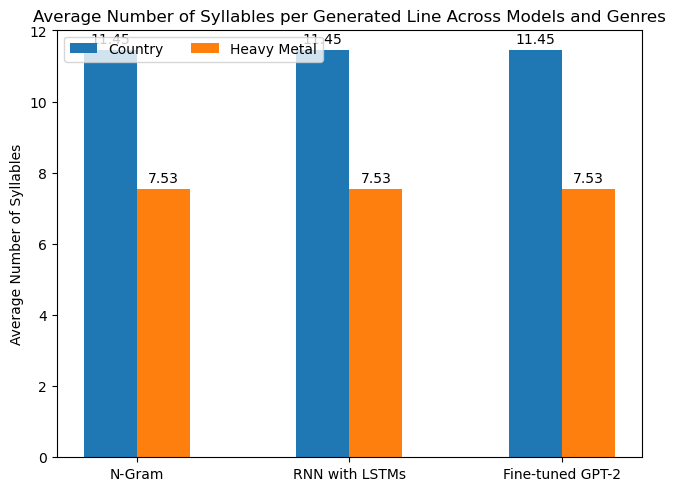

In [84]:
country_num_syllables = (avg_syllables_per_line(ngram_country_seqs))
metal_num_syllables = (avg_syllables_per_line(ngram_metal_seqs))
create_grouped_barchart(country_num_syllables, metal_num_syllables, 'Average Number of Syllables per Generated Line Across Models and Genres', 'Average Number of Syllables')

##### Top Tokens

In [85]:
def get_top_k_tokens(sequences: list, k: int)-> list:
    """" 
    Gets the k most common tokens across the provided sequences

    Args:
        sequences (list): a list of strings representing generated lyrics
        k (int): the number of top words to return 

    Returns:
        a list of the k most frequent words from the sequences 
    """
    all_tokens = []
    for seq in sequences:
        all_tokens.extend(nltk.word_tokenize(seq))

    top_tokens = Counter(all_tokens).most_common(k)
    return [tok for (tok, _) in top_tokens]

In [87]:
# Adapted from the chat-gpt response to the prompt - "how to use TfidfVectorizer to find unique and characteristic words in a class"

# the number of top characteristic words to return
k = 10

# considering our different sources of generated text to be our documents  
documents = [ngram_country_seqs, ngram_metal_seqs] #,lstm_country_seqs, lstm_metal_seqs, gpt2_country_seqs, gpt2_metal_seqs]
document_labels = ["N-Gram Country", "N-Gram Heavy Metal"]#, "RNN + LSTM Country", "RNN + LSTM Heavy Metal", "GPT2 Country", "GPT2 Heavy Metal"]

# represent each document with a list string containing all sequences 
documents_as_strings = [' '.join(doc) for doc in documents]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_as_strings)

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, document in enumerate(documents):
    # Calculate the TF-IDF score for each word in the document
    tfidf_scores = tfidf_matrix[i].toarray().flatten()

    # Get indices of top k words with highest TF-IDF scores
    top_n_indices = tfidf_scores.argsort()[-k:][::-1]  

    # Map indices to feature names
    top_n_words = [feature_names[i] for i in top_n_indices]

    # Print characteristic words for the document
    print(f"{document_labels[i]} characteristic words: {', '.join(top_n_words)}")


N-Gram Country characteristic words: the, you, to, that, and, me, but, your, in, just
N-Gram Heavy Metal characteristic words: the, you, to, my, me, and, of, all, your, it
